In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os


# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
import random

In [3]:
data_dir = 'images/'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'validation')

Plotting one image from each emotion.

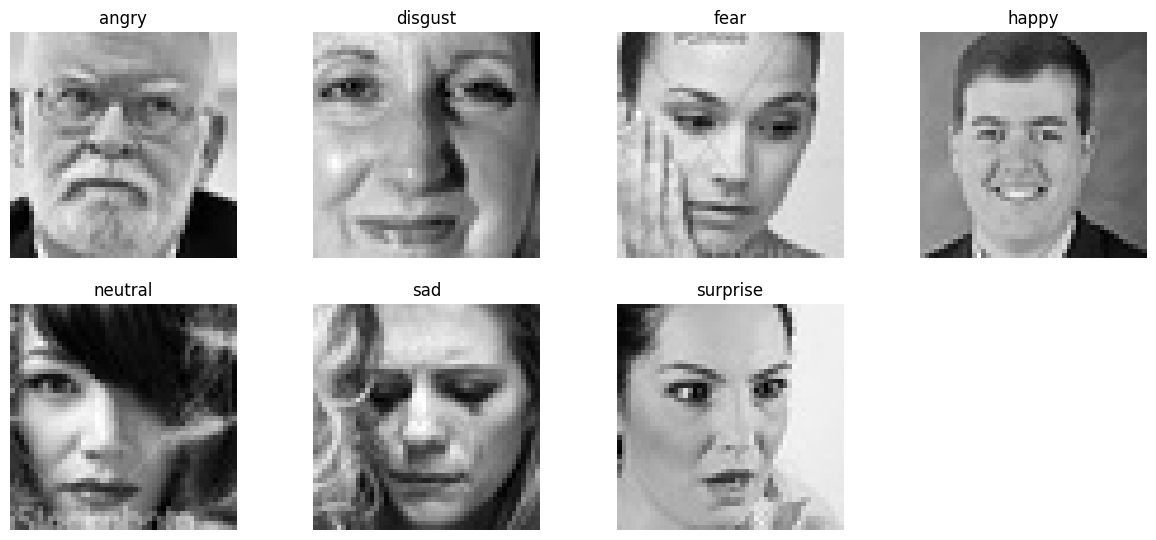

In [4]:
emotions = os.listdir(train_dir)
plt.figure(figsize=(15,10))

for i, emotion in enumerate(emotions, 1):
    folder = os.path.join(train_dir, emotion)
    img_path = os.path.join(folder, os.listdir(folder)[42])
    img = plt.imread(img_path)
    plt.subplot(3, 4, i)
    plt.imshow(img, cmap='gray')
    plt.title(emotion)
    plt.axis('off')

In [5]:
def plot_images_from_directory(directory_path, class_name, num_images=9):
    # Retrieve list of all file names in the directory
    image_filenames = os.listdir(directory_path)

    # If there are fewer images than requested, we'll just show them all
    if len(image_filenames) < num_images:
        print(f"Only found {len(image_filenames)} images in {directory_path}, displaying them all.")
        num_images = len(image_filenames)

    # Randomly select 'num_images' number of file names
    selected_images = random.sample(image_filenames, num_images)

    # Plotting the images
    fig, axes = plt.subplots(3, 3, figsize=(5, 5))  # Adjust the size as needed
    axes = axes.ravel()

    for i, image_file in enumerate(selected_images):
        image_path = os.path.join(directory_path, image_file)
        # image = Image.open(image_path)
        image = load_img(image_path)
        axes[i].imshow(image)
        axes[i].set_title(f"Image: {class_name}")
        axes[i].axis('off')  # Hide the axis

    plt.tight_layout()
    plt.show()

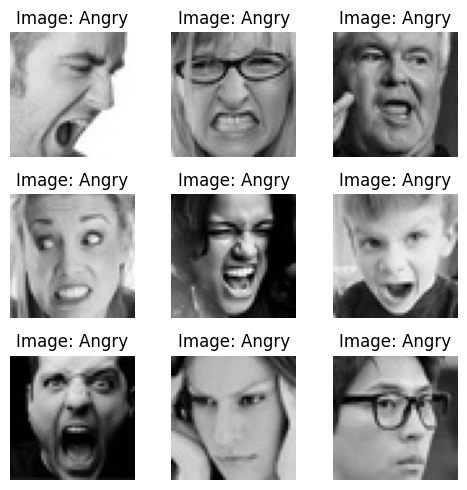

In [6]:
# Placeholder for the directory path
angry_directory_path = train_dir+'/angry'
plot_images_from_directory(angry_directory_path, class_name = 'Angry')

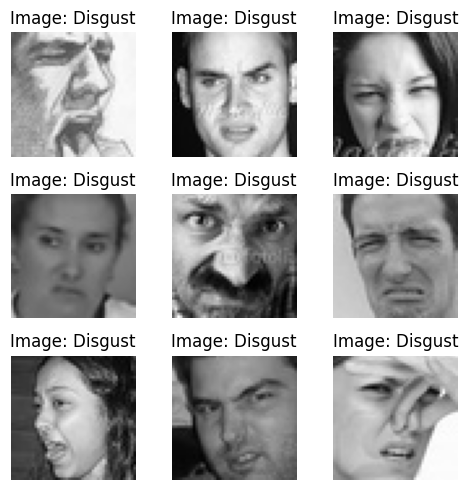

In [7]:
# Placeholder for the directory path
disgust_directory_path = train_dir+'/disgust'
plot_images_from_directory(disgust_directory_path, class_name = 'Disgust')

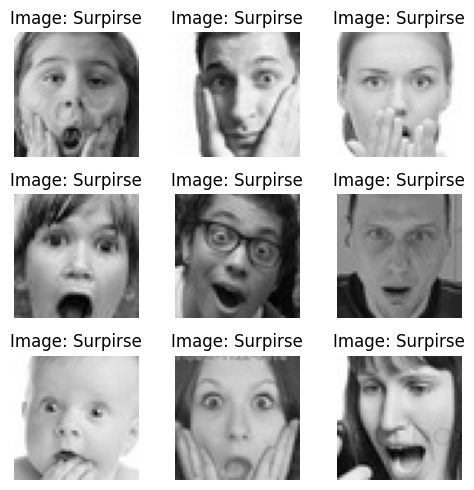

In [8]:
# Placeholder for the directory path
surpirse_directory_path = train_dir+'/surprise'
plot_images_from_directory(surpirse_directory_path, class_name = 'Surpirse')

In [9]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(data_dir+"train",
                                              target_size = (48,48),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(data_dir+"validation",
                                              target_size = (48,48),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [10]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(learning_rate=0.0001) 

model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\ranas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,02

 Total params: 4,478,727 (17.08 MB)

 Trainable params: 4,474,759 (17.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

Fitting the Model with Training and Validation Data

In [11]:
import os

os.makedirs("model", exist_ok=True)

In [12]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint(
    filepath="model/best_model.keras",   # relative path inside your project
    monitor='val_accuracy',              # correct metric name
    verbose=1,
    save_best_only=True,
    mode='max'
)

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=6,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [13]:
history = model.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

c:\Users\ranas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2641 - loss: 1.9441
Epoch 1: val_accuracy improved from -inf to 0.29886, saving model to model/best_model.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 592s 3s/step - accuracy: 0.2643 - loss: 1.9434 - val_accuracy: 0.2989 - val_loss: 2.0728 - learning_rate: 0.0010
Epoch 2/48
  1/225 ━━━━━━━━━━━━━━━━━━━━ 7:15 2s/step - accuracy: 0.3750 - loss: 1.5875

c:\Users\ranas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy improved from 0.29886 to 0.32486, saving model to model/best_model.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 28s 114ms/step - accuracy: 0.3750 - loss: 1.5875 - val_accuracy: 0.3249 - val_loss: 1.9253 - learning_rate: 0.0010
Epoch 3/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4306 - loss: 1.4811
Epoch 3: val_accuracy improved from 0.32486 to 0.43423, saving model to model/best_model.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 454s 2s/step - accuracy: 0.4306 - loss: 1.4809 - val_accuracy: 0.4342 - val_loss: 1.5034 - learning_rate: 0.0010
Epoch 4/48
  1/225 ━━━━━━━━━━━━━━━━━━━━ 6:56 2s/step - accuracy: 0.4688 - loss: 1.3648
Epoch 4: val_accuracy improved from 0.43423 to 0.44332, saving model to model/best_model.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 28s 116ms/step - accuracy: 0.4688 - loss: 1.3648 - val_accuracy: 0.4433 - val_loss: 1.4657 - learning_rate: 0.0010
Epoch 5/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5042 - loss: 1.2892
Epoch 5: val_accuracy impro

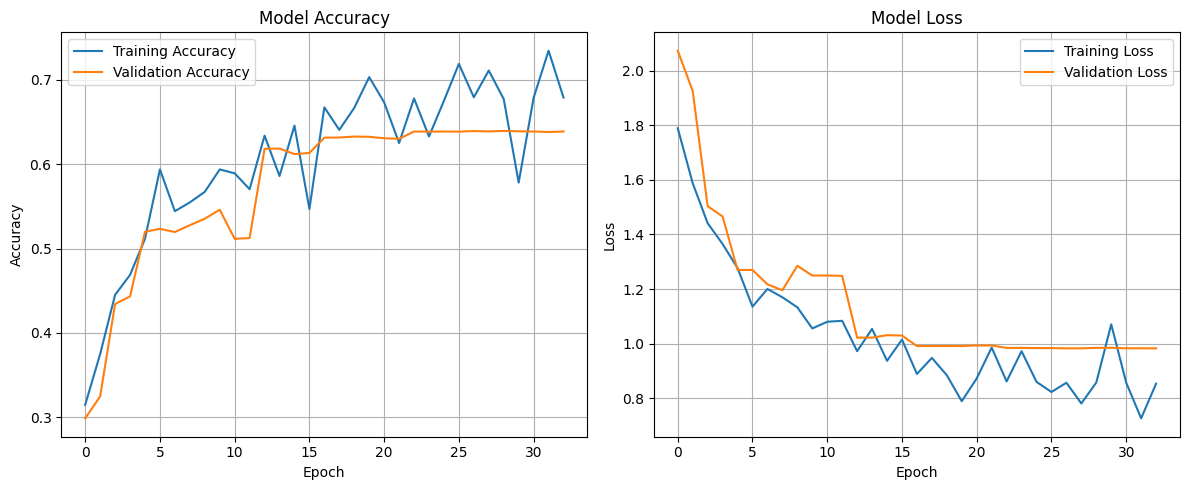

In [14]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


56/56 ━━━━━━━━━━━━━━━━━━━━ 23s 400ms/step
Classification Report:

              precision    recall  f1-score   support

       angry       0.58      0.51      0.54       960
     disgust       0.65      0.56      0.60       111
        fear       0.56      0.35      0.43      1018
       happy       0.83      0.86      0.84      1825
     neutral       0.57      0.64      0.60      1216
         sad       0.47      0.57      0.52      1139
    surprise       0.74      0.78      0.76       797

    accuracy                           0.64      7066
   macro avg       0.63      0.61      0.61      7066
weighted avg       0.64      0.64      0.63      7066



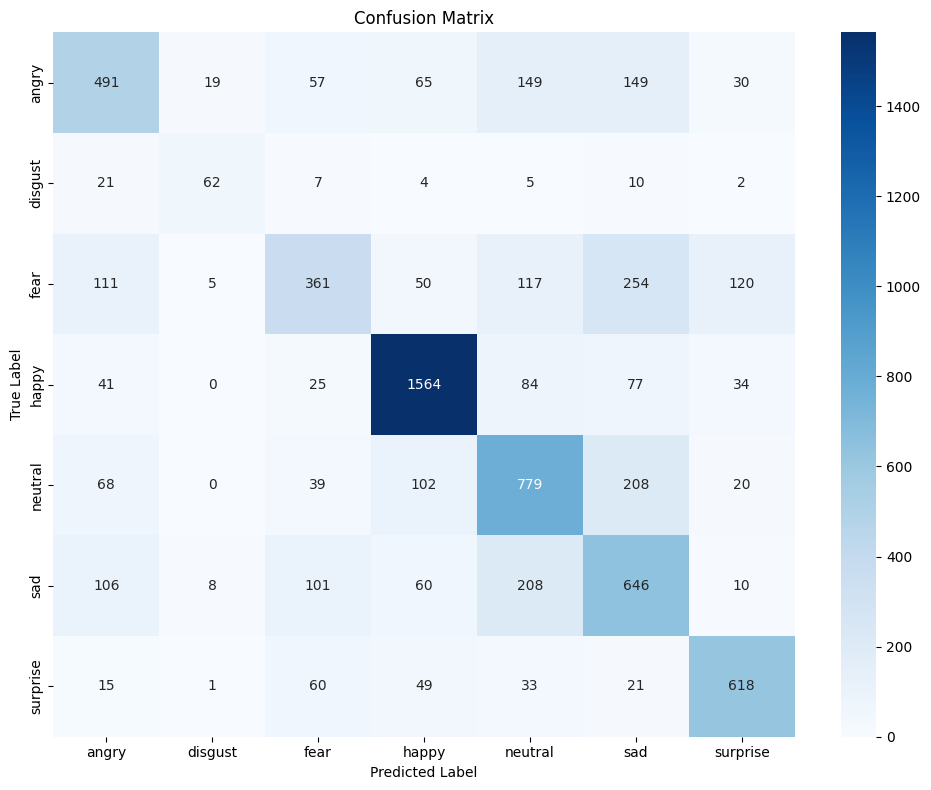

In [15]:
from sklearn.metrics import classification_report, confusion_matrix



# Step 1: Get true labels
true_labels = test_set.classes

# Step 2: Get predicted probabilities
pred_prob = model.predict(test_set, steps=test_set.n // test_set.batch_size + 1, verbose=1)

# Step 3: Get predicted class indices
pred_labels = np.argmax(pred_prob, axis=1)

# Step 4: Get class names
class_names = list(test_set.class_indices.keys())

# Step 5: Print classification report
print("Classification Report:\n")
print(classification_report(true_labels, pred_labels, target_names=class_names))

# Step 6: Confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Step 7: Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


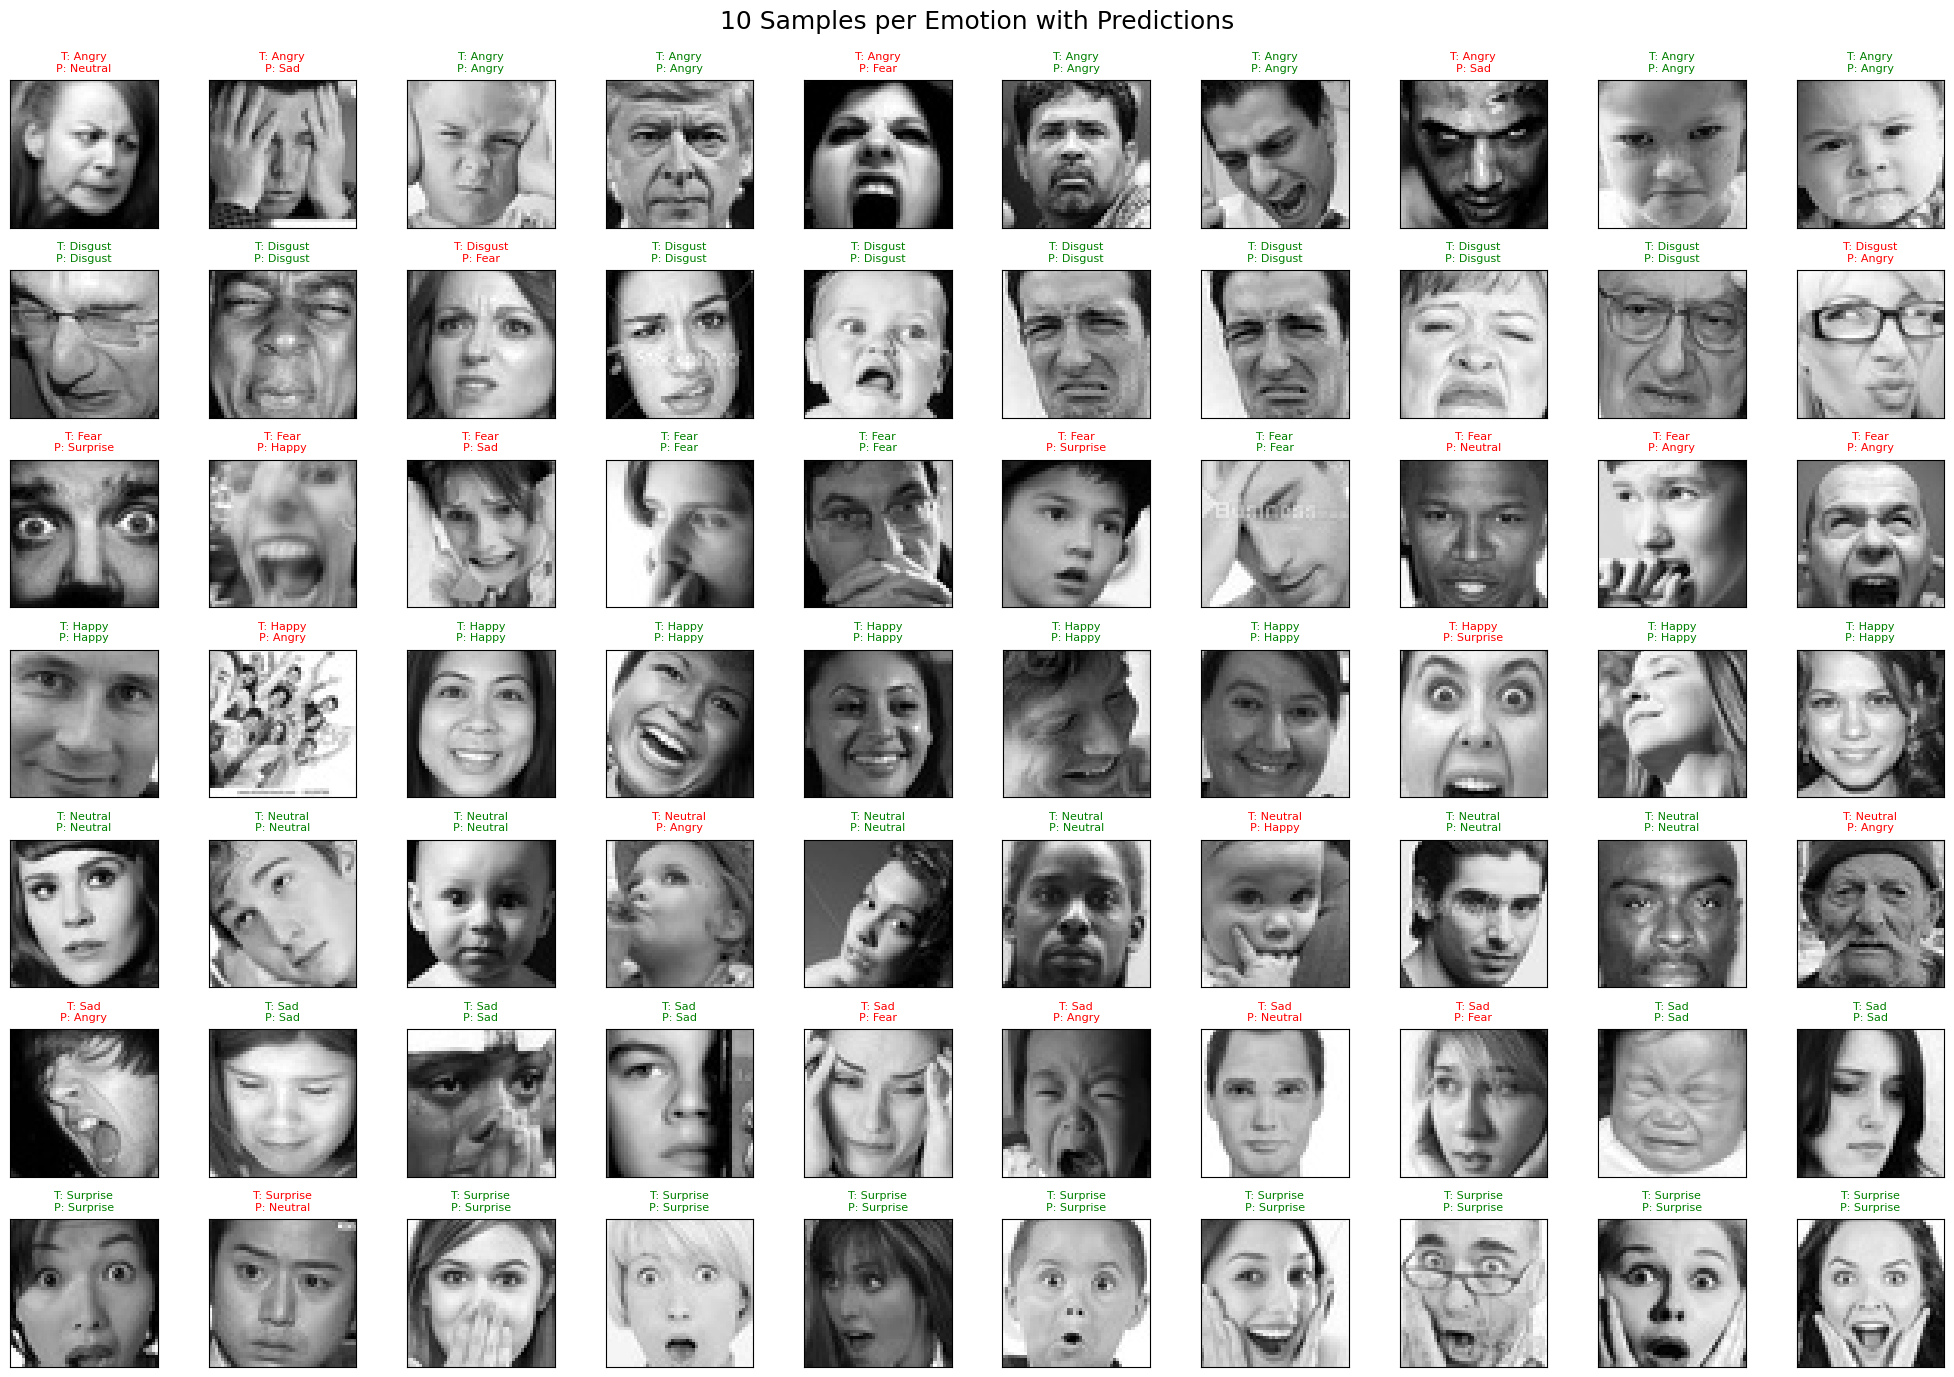

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Emotion_Classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Collect 10 images from each class
images_per_class = 10
collected_images = []
collected_labels = []
collected_preds = []

# Loop through batches until we gather enough images per class
class_counts = {label: 0 for label in range(len(Emotion_Classes))}

for batch_images, batch_labels in test_set:
    for img, label_vec in zip(batch_images, batch_labels):
        label = np.argmax(label_vec)
        if class_counts[label] < images_per_class:
            # Predict
            pred = np.argmax(model.predict(tf.expand_dims(img, axis=0), verbose=0)[0])
            collected_images.append(img)
            collected_labels.append(label)
            collected_preds.append(pred)
            class_counts[label] += 1
        if all(v >= images_per_class for v in class_counts.values()):
            break
    if all(v >= images_per_class for v in class_counts.values()):
        break

# Plotting 10x7 = 70 images
fig, axes = plt.subplots(nrows=7, ncols=10, figsize=(20, 14),
                         subplot_kw={'xticks': [], 'yticks': []})
fig.suptitle("10 Samples per Emotion with Predictions", fontsize=18)

for i, ax in enumerate(axes.flat):
    if i >= len(collected_images):
        break
    img = collected_images[i]
    true_label = Emotion_Classes[collected_labels[i]]
    pred_label = Emotion_Classes[collected_preds[i]]
    color = 'green' if true_label == pred_label else 'red'

    ax.imshow(img.squeeze(), cmap='gray')
    ax.set_title(f"T: {true_label}\nP: {pred_label}", color=color, fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()
